In [63]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow import keras
import numpy as np
import pandas as pd

In [30]:
#Load the data for the use of demo
df = pd.read_csv('SP500_for_practice_csv.csv', sep = ',', parse_dates = ['Date'])
df

,Date,SP500,SP500_%Change
0,1995-01-03,459.11,NaN
1,1995-01-04,460.71,0.348500
2,1995-01-05,460.34,-0.080311
3,1995-01-06,460.68,0.073858
4,1995-01-09,460.83,0.032561
...,...,...,...
6400,2020-06-04,"3,112.35",-0.336870
6401,2020-06-05,"3,193.93",2.621170
6402,2020-06-08,"3,232.39",1.204159
6403,2020-06-09,"3,207.18",-0.779918


In [16]:
#Chop out one portion of dataframe for demo
df_new = df.head(1000)
print(df_new)
df_new.describe()

          Date    SP500  SP500_%Change
0   1995-01-03   459.11            NaN
1   1995-01-04   460.71       0.348500
2   1995-01-05   460.34      -0.080311
3   1995-01-06   460.68       0.073858
4   1995-01-09   460.83       0.032561
..         ...      ...            ...
995 1998-12-09  1183.49       0.178605
996 1998-12-10  1165.02      -1.560638
997 1998-12-11  1166.46       0.123603
998 1998-12-14   1141.2      -2.165526
999 1998-12-15  1162.83       1.895373

[1000 rows x 3 columns]


,SP500_%Change
count,999.000000
mean,0.097732
std,0.964696
min,-6.865681
25%,-0.360472
50%,0.100876
75%,0.590136
max,5.115224


Basic preprocessing

In [17]:
#drop the missing value
df_new = df_new.dropna()
#print(df_new)

#Set date time index to easily master the data
df_new.set_index('Date', inplace = True)
print(df_new)

              SP500  SP500_%Change
Date                              
1995-01-04   460.71       0.348500
1995-01-05   460.34      -0.080311
1995-01-06   460.68       0.073858
1995-01-09   460.83       0.032561
1995-01-10   461.68       0.184450
...             ...            ...
1998-12-09  1183.49       0.178605
1998-12-10  1165.02      -1.560638
1998-12-11  1166.46       0.123603
1998-12-14   1141.2      -2.165526
1998-12-15  1162.83       1.895373

[999 rows x 2 columns]


In [18]:
#Choose one single dimension --- SP500_%Change ---as the target for forecasting
#This data is a demo for univariate LSTM modelling
df_new = df_new.drop(['SP500'], axis = 1)

            SP500_%Change
Date                     
1995-01-04       0.348500
1995-01-05      -0.080311
1995-01-06       0.073858
1995-01-09       0.032561
1995-01-10       0.184450
...                   ...
1998-12-09       0.178605
1998-12-10      -1.560638
1998-12-11       0.123603
1998-12-14      -2.165526
1998-12-15       1.895373

[999 rows x 1 columns]


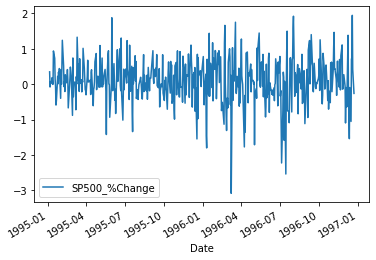

In [19]:
# Visualisation
%matplotlib inline
df_new.head(500).plot()
print(df_new)

# More time-based visualisation using seaborn

https://seaborn.pydata.org/generated/seaborn.lineplot.html

In [40]:
#Use original data to show more datetime-based line plots
#Data processing for visualisation
df2 = df.copy()
df2_new = df2.dropna() #NAs is suggested to be dropped before datetime index is set.
df2_new.set_index('Date', inplace = True)
#print(df2)

#Create new columns recording correspinding time stamp
df2_new['day'] = df2_new.index.day
df2_new['month'] = df2_new.index.month
df2_new['year'] = df2_new.index.year
df2_new['day_of_week'] = df2_new.index.dayofweek

df2_new = df2_new.head(1000)
df2_new

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,SP500,SP500_%Change,day,month,year,day_of_week
Date,,,,,,
1995-01-04,460.71,0.348500,4,1,1995,2
1995-01-05,460.34,-0.080311,5,1,1995,3
1995-01-06,460.68,0.073858,6,1,1995,4
1995-01-09,460.83,0.032561,9,1,1995,0
1995-01-10,461.68,0.184450,10,1,1995,1
...,...,...,...,...,...,...
1998-12-10,1165.02,-1.560638,10,12,1998,3
1998-12-11,1166.46,0.123603,11,12,1998,4
1998-12-14,1141.2,-2.165526,14,12,1998,0


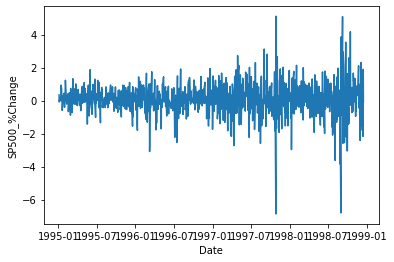

In [44]:
import seaborn as sns
sns.lineplot(data = df2_new, x = df2_new.index, y = df2_new['SP500_%Change'])

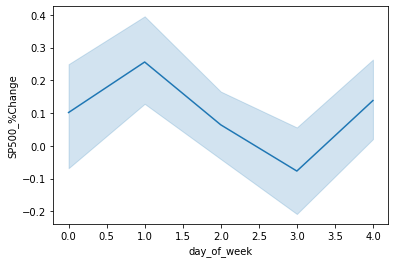

In [46]:
#Show the change of return patterns by day of week (0 for Mon., and etc.)
#The interval is 95% confidence interval, and this applies to the sae things as below
sns.lineplot(data = df2_new, x = df2_new.day_of_week, y = df2_new['SP500_%Change'])

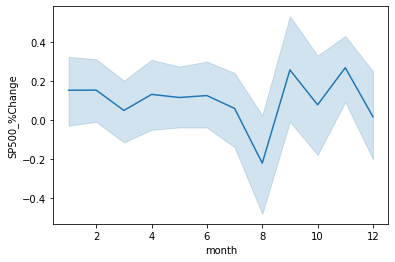

In [48]:
#Monthly pattern for return changes
sns.lineplot(data = df2_new, x = df2_new.month, y = df2_new['SP500_%Change'])

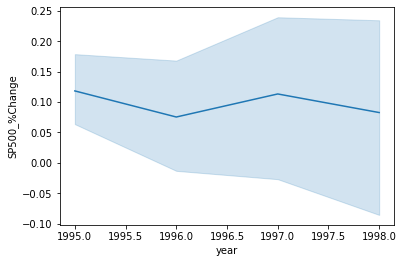

In [49]:
#Yearly patterns
sns.lineplot(data = df2_new, x = df2_new.year, y = df2_new['SP500_%Change'])

Slice out training and test set

In [50]:
#Split training and testing set (using univariate df_new)
df_train = df_new["1995/1/4":"1997/12/31"]
df_test = df_new["1997/12/31":] # ["start_date": ] start date to end
print(df_train.shape)
print(df_test.shape)

(758, 1)
(242, 1)


Sequential Data

In [24]:
print(type(df_train)); print(type(df_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [52]:
#Define the sequential data transformation
#Would work better on the pandas.DataFrame type of data
#Resources: #Resources: https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_10_2_lstm.ipynb 

def to_sequential(data, seq_size):
    x = []
    y = []
    for i in range(len(data) - seq_size):
        first_window = data.iloc[i:(i + seq_size), 0]
        further_window = data.iloc[i + seq_size, 0]
        #print(first_window)
        first_window = [[value] for value in first_window]
        x.append(first_window)
        y.append(further_window)
    return np.array(x), np.array(y).reshape(len(y), 1)
    #Series input into array: some data format issue occurs, so .reshape() is called to fix it into proper results.

In [53]:
#Transform the training dataset into sequential-typed data
seq_train_x, seq_train_y = to_sequential(df_train, 1)

In [54]:
print(seq_train_x.shape); print(seq_train_y.shape)

(757, 1, 1)
(757, 1)


In [55]:
print(seq_train_x)

[[[ 3.48500359e-01]]

 [[-8.03108250e-02]]

 [[ 7.38584520e-02]]

 [[ 3.25605630e-02]]

 [[ 1.84449797e-01]]

 [[-4.33200500e-03]]

 [[-4.33219300e-03]]

 [[ 9.37960315e-01]]

 [[ 7.31806769e-01]]

 [[ 1.42741489e-01]]

 [[-7.02052970e-02]]

 [[-5.89713021e-01]]

 [[-4.64717850e-01]]

 [[ 2.21610224e-01]]

 [[ 1.07339900e-02]]

 [[ 3.39157687e-01]]

 [[ 1.88259456e-01]]

 [[ 4.42005466e-01]]

 [[-3.99668360e-01]]

 [[ 4.07675396e-01]]

 [[-4.25152000e-03]]

 [[ 5.05952381e-01]]

 [[ 1.23947714e+00]]

 [[ 5.22313221e-01]]

 [[-6.85871060e-02]]

 [[ 7.90332980e-02]]

 [[-2.07818118e-01]]

 [[ 2.64478644e-01]]

 [[ 3.94632990e-02]]

 [[ 1.86857677e-01]]

 [[ 4.12392498e-01]]

 [[ 1.40339291e-01]]

 [[-6.69799266e-01]]

 [[ 1.59760981e-01]]

 [[ 4.82661474e-01]]

 [[ 3.79326695e-01]]

 [[ 2.46452116e-01]]

 [[-8.80948966e-01]]

 [[ 7.39959902e-01]]

 [[-3.57003632e-01]]

 [[-1.07072995e-01]]

 [[ 5.97777920e-02]]

 [[ 4.32615060e-02]]

 [[-7.22772481e-01]]

 [[ 2.11565585e-01]]

 [[ 4.1395

In [56]:
print(seq_train_y)

[[-8.03108250e-02]
 [ 7.38584520e-02]
 [ 3.25605630e-02]
 [ 1.84449797e-01]
 [-4.33200500e-03]
 [-4.33219300e-03]
 [ 9.37960315e-01]
 [ 7.31806769e-01]
 [ 1.42741489e-01]
 [-7.02052970e-02]
 [-5.89713021e-01]
 [-4.64717850e-01]
 [ 2.21610224e-01]
 [ 1.07339900e-02]
 [ 3.39157687e-01]
 [ 1.88259456e-01]
 [ 4.42005466e-01]
 [-3.99668360e-01]
 [ 4.07675396e-01]
 [-4.25152000e-03]
 [ 5.05952381e-01]
 [ 1.23947714e+00]
 [ 5.22313221e-01]
 [-6.85871060e-02]
 [ 7.90332980e-02]
 [-2.07818118e-01]
 [ 2.64478644e-01]
 [ 3.94632990e-02]
 [ 1.86857677e-01]
 [ 4.12392498e-01]
 [ 1.40339291e-01]
 [-6.69799266e-01]
 [ 1.59760981e-01]
 [ 4.82661474e-01]
 [ 3.79326695e-01]
 [ 2.46452116e-01]
 [-8.80948966e-01]
 [ 7.39959902e-01]
 [-3.57003632e-01]
 [-1.07072995e-01]
 [ 5.97777920e-02]
 [ 4.32615060e-02]
 [-7.22772481e-01]
 [ 2.11565585e-01]
 [ 4.13958700e-03]
 [ 1.32668267e+00]
 [ 9.80452230e-02]
 [ 5.79532701e-01]
 [-2.04913875e-01]
 [ 7.17654713e-01]
 [ 2.22038310e-02]
 [ 1.27139167e-01]
 [-2.1767610

In [57]:
#Transform the test dataset into sequential-typed data
seq_test_x, seq_test_y = to_sequential(df_test, 1)

In [58]:
print(seq_test_x.shape); print(seq_test_y.shape)

(241, 1, 1)
(241, 1)


Build the LSTM model (with bidirectional learning layer)

In [64]:
#Define the model (the most simple form: 1 LSTM layer and then output layer)
model = Sequential()
model.add(keras.layers.Bidirectional(keras.layers.LSTM(
        units = 128, activation = 'tanh', 
        dropout = 0.0, 
        recurrent_dropout = 0.0, 
        input_shape = (seq_train_x.shape[1], seq_train_x.shape[2])
        )
    )
)

model.add(Dense(1))


In [65]:
model.compile(optimizer = 'adam', 
             loss = 'mean_squared_error')
             #metrics = ['mean_absolute_percentage_error'])

In [70]:
#Fit/Train the model
model_fit = model.fit(seq_train_x, seq_train_y, 
              batch_size = 5, 
              #validation_data = (seq_test_x, seq_test_y),
              epochs = 15,
              validation_split = 0.1,
              verbose = 2,
              shuffle = False)

#Summarise the model
model.summary()

Epoch 1/15
137/137 - 0s - loss: 0.5472 - val_loss: 1.9577
Epoch 2/15
137/137 - 0s - loss: 0.5472 - val_loss: 1.9559
Epoch 3/15
137/137 - 0s - loss: 0.5472 - val_loss: 1.9542
Epoch 4/15
137/137 - 0s - loss: 0.5471 - val_loss: 1.9527
Epoch 5/15
137/137 - 0s - loss: 0.5471 - val_loss: 1.9513
Epoch 6/15
137/137 - 0s - loss: 0.5470 - val_loss: 1.9501
Epoch 7/15
137/137 - 0s - loss: 0.5470 - val_loss: 1.9490
Epoch 8/15
137/137 - 0s - loss: 0.5470 - val_loss: 1.9480
Epoch 9/15
137/137 - 0s - loss: 0.5469 - val_loss: 1.9470
Epoch 10/15
137/137 - 0s - loss: 0.5469 - val_loss: 1.9462
Epoch 11/15
137/137 - 0s - loss: 0.5469 - val_loss: 1.9453
Epoch 12/15
137/137 - 0s - loss: 0.5469 - val_loss: 1.9446
Epoch 13/15
137/137 - 0s - loss: 0.5468 - val_loss: 1.9439
Epoch 14/15
137/137 - 0s - loss: 0.5468 - val_loss: 1.9432
Epoch 15/15
137/137 - 0s - loss: 0.5468 - val_loss: 1.9426
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output 

Plot some results

In [69]:
import matplotlib.pyplot as plt

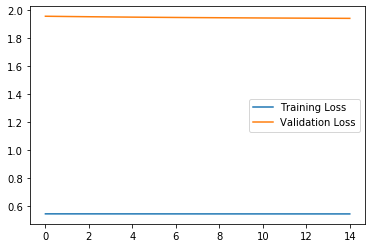

In [74]:
#Plot the outcomes from the training process (recorded in object via .fit())
#plot loss and validation loss against epochs
plt.plot(model_fit.history['loss'], label = "Training Loss")
plt.plot(model_fit.history['val_loss'], label = "Validation Loss")
plt.legend()

Obviously, this is a failed training. It is purely for demo.

Prediction: in-sample prediction

Predict on training set

In [76]:
# Try predict on training set
y_predict = model.predict(seq_train_x)
print(y_predict)

[[0.11591307]
 [0.07768746]
 [0.08994175]
 [0.08649451]
 [0.09976438]
 [0.08351678]
 [0.08351678]
 [0.18918256]
 [0.16088796]
 [0.09595893]
 [0.07843922]
 [0.04918706]
 [0.05447334]
 [0.10325765]
 [0.08472119]
 [0.11494303]
 [0.10011806]
 [0.1259548 ]
 [0.05766349]
 [0.12219774]
 [0.08352318]
 [0.13316976]
 [0.2355689 ]
 [0.13506085]
 [0.07856027]
 [0.09038219]
 [0.06882396]
 [0.10740753]
 [0.08706232]
 [0.0999878 ]
 [0.12270915]
 [0.09574346]
 [0.04638261]
 [0.09749703]
 [0.13050935]
 [0.11915668]
 [0.10564683]
 [0.04116147]
 [0.16195314]
 [0.0599192 ]
 [0.07573151]
 [0.08875289]
 [0.08737619]
 [0.04477709]
 [0.10230387]
 [0.08419205]
 [0.2500633 ]
 [0.09201651]
 [0.14181879]
 [0.069013  ]
 [0.15904965]
 [0.08564888]
 [0.09456676]
 [0.06818675]
 [0.09404088]
 [0.08847724]
 [0.20005877]
 [0.12630151]
 [0.09563334]
 [0.07236986]
 [0.07073411]
 [0.06309611]
 [0.10383711]
 [0.1536539 ]
 [0.08921878]
 [0.09226205]
 [0.08937639]
 [0.09362764]
 [0.06361021]
 [0.11342435]
 [0.12203544]
 [0.04

In [77]:
y_predict.reshape(-1)

array([0.11591307, 0.07768746, 0.08994175, 0.08649451, 0.09976438,
       0.08351678, 0.08351678, 0.18918256, 0.16088796, 0.09595893,
       0.07843922, 0.04918706, 0.05447334, 0.10325765, 0.08472119,
       0.11494303, 0.10011806, 0.1259548 , 0.05766349, 0.12219774,
       0.08352318, 0.13316976, 0.2355689 , 0.13506085, 0.07856027,
       0.09038219, 0.06882396, 0.10740753, 0.08706232, 0.0999878 ,
       0.12270915, 0.09574346, 0.04638261, 0.09749703, 0.13050935,
       0.11915668, 0.10564683, 0.04116147, 0.16195314, 0.0599192 ,
       0.07573151, 0.08875289, 0.08737619, 0.04477709, 0.10230387,
       0.08419205, 0.2500633 , 0.09201651, 0.14181879, 0.069013  ,
       0.15904965, 0.08564888, 0.09456676, 0.06818675, 0.09404088,
       0.08847724, 0.20005877, 0.12630151, 0.09563334, 0.07236986,
       0.07073411, 0.06309611, 0.10383711, 0.1536539 , 0.08921878,
       0.09226205, 0.08937639, 0.09362764, 0.06361021, 0.11342435,
       0.12203544, 0.0484788 , 0.0726892 , 0.07704362, 0.08989

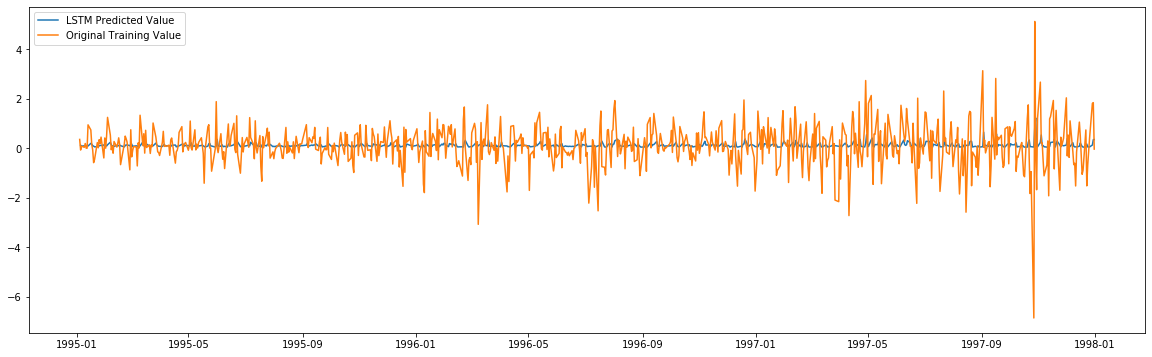

In [78]:
plt.figure(figsize=(20,6))
plt.plot(df_train.index[1:len(df_train.index)], y_predict, label = "LSTM Predicted Value")
plt.plot(df_train.index, df_train['SP500_%Change'], label = "Original Training Value")
plt.legend()

In-sample prediction --- in test set

In [83]:
#Predict on test set
y_predict_test = model.predict(seq_test_x)
print(y_predict_test)

[[0.08055796]
 [0.12964767]
 [0.10198555]
 [0.03912818]
 [0.065107  ]
 [0.04224557]
 [0.14787018]
 [0.23594785]
 [0.25822207]
 [0.14566319]
 [0.04395886]
 [0.21865687]
 [0.3323489 ]
 [0.0428833 ]
 [0.04278328]
 [0.050108  ]
 [0.07869159]
 [0.23915121]
 [0.17968056]
 [0.17285338]
 [0.05163006]
 [0.40726265]
 [0.12934905]
 [0.09127562]
 [0.06120606]
 [0.1821869 ]
 [0.0713404 ]
 [0.17240307]
 [0.09202424]
 [0.12189733]
 [0.05788057]
 [0.10713873]
 [0.18535914]
 [0.05931533]
 [0.14147791]
 [0.11922828]
 [0.04456917]
 [0.22874728]
 [0.13868862]
 [0.08909868]
 [0.07226708]
 [0.12270256]
 [0.05536966]
 [0.03908725]
 [0.37609857]
 [0.06197071]
 [0.21877933]
 [0.12099478]
 [0.09532923]
 [0.07463141]
 [0.1978853 ]
 [0.09299889]
 [0.12899421]
 [0.12016179]
 [0.17876631]
 [0.06150211]
 [0.1868788 ]
 [0.06105186]
 [0.07605871]
 [0.05345339]
 [0.07116129]
 [0.16325141]
 [0.1419823 ]
 [0.20881373]
 [0.10503919]
 [0.07497792]
 [0.03920738]
 [0.04511365]
 [0.17247926]
 [0.07710302]
 [0.13784282]
 [0.11

In [84]:
y_predict_test.reshape(1, -1)

array([[0.08055796, 0.12964767, 0.10198555, 0.03912818, 0.065107  ,
        0.04224557, 0.14787018, 0.23594785, 0.25822207, 0.14566319,
        0.04395886, 0.21865687, 0.3323489 , 0.0428833 , 0.04278328,
        0.050108  , 0.07869159, 0.23915121, 0.17968056, 0.17285338,
        0.05163006, 0.40726265, 0.12934905, 0.09127562, 0.06120606,
        0.1821869 , 0.0713404 , 0.17240307, 0.09202424, 0.12189733,
        0.05788057, 0.10713873, 0.18535914, 0.05931533, 0.14147791,
        0.11922828, 0.04456917, 0.22874728, 0.13868862, 0.08909868,
        0.07226708, 0.12270256, 0.05536966, 0.03908725, 0.37609857,
        0.06197071, 0.21877933, 0.12099478, 0.09532923, 0.07463141,
        0.1978853 , 0.09299889, 0.12899421, 0.12016179, 0.17876631,
        0.06150211, 0.1868788 , 0.06105186, 0.07605871, 0.05345339,
        0.07116129, 0.16325141, 0.1419823 , 0.20881373, 0.10503919,
        0.07497792, 0.03920738, 0.04511365, 0.17247926, 0.07710302,
        0.13784282, 0.11296924, 0.03963429, 0.24

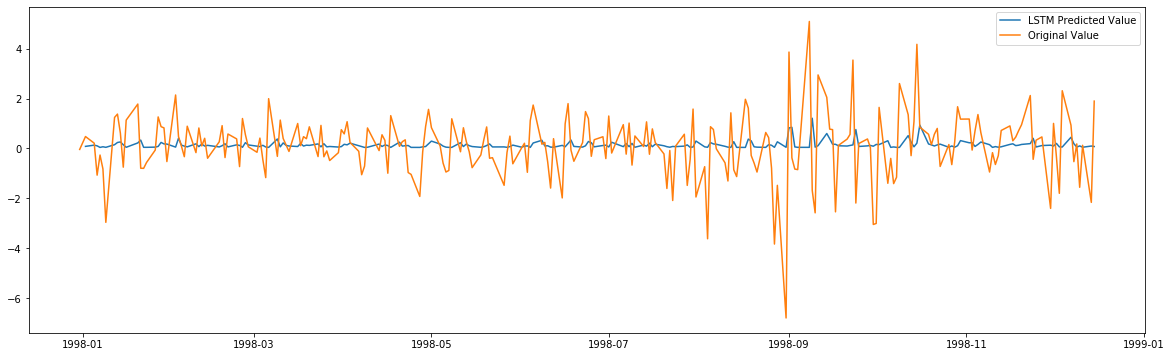

In [85]:
#Plot the in-sample prediction results
plt.figure(figsize=(20,6))
plt.plot(df_test.index[1:len(df_test.index)], y_predict_test, label = "LSTM Predicted Value")
plt.plot(df_test.index, df_test['SP500_%Change'], label = "Original Value")
plt.legend()

It can't really work well due to very simple model structure (only 1 LSTM layer with bidirectional learning layer used). However the generic trend and fluctuation are roughly obtained, whilst having a limited volatility that is not enough to reflect how strong the real situation is. 
Ver. 2020-12-20

Note for model improvement:
Due to noise of stock market data, outliers matters, especially in terms of robustness and preditability. It is hence suggested that we can scale the data regardless of X or Y (like sklearn RobustScale function) for better training and prediction. In this case, one should inversely transform the scaled data back to the original state for plotting, articulation or productionisation. 
Also, It is recommended to apply multivariate LSTM model to increase model complexity.
2020-12-20